# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Descripción de los datos](#data_review)
    * [Conclusiones](#data_review_conclusions)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
    * [2.1 Estilo del encabezado](#header_style)
    * [2.2 Valores ausentes](#missing_values)
    * [2.3 Duplicados](#duplicates)
    * [2.4 Conclusiones](#data_preprocessing_conclusions)
* [Etapa 3. Prueba de hipótesis](#hypothesis)
    * [3.1 Hipótesis 1: actividad de los usuarios y las usuarias en las dos ciudades](#activity)
* [Conclusiones](#end)

BORRAR

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Diccionario de datos](#data)
* [Exploración y preprocesamiento de datos](#pre)
* [Análisis de datos](#Analisis)

## Diccionario de datos<a id='dic_data'></a>

El dataset contiene datos que se remontan a 2016, que proporcionan datos importantes de videojuegos.
Descripción de datos:

-Name (Nombre)

-Platform (Plataforma)

-Year_of_Release: Año de lanzamiento del juego

-Genre (Género) 

-NA_sales: ventas en Norteamérica en millones de dólares estadounidenses 

-EU_sales: ventas en Europa en millones de dólares estadounidenses 

-JP_sales: ventas en Japón en millones de dólares estadounidenses 

-Other_sales: ventas en otros países en millones de dólares estadounidenses 

-Critic_Score (máximo de 100) 

-User_Score (máximo de 10) 

-Rating (ESRB)



## Preprocesamiento de datos<a id='pre'></a>
Primero, se evaluará la calidad de los datos y si los problemas presentes son significativos. Entonces, durante el preprocesamiento de datos, se tomaran las medidas necesarias para resolver cualquier problema.

El objetivo de este apartado es la exploración, modificación y corrección de los datos del data frame para posteriormente analizar los datos. 

In [2]:
import pandas as pd 
import numpy as np
games_df = pd.read_csv('games.csv')

In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Al ver nuestros datos a simple vista se haran cambios, los cuales incluyen el nombre de las columnas (unicamente manejaremos mínusculas), así como el formato de tipo en las columnas 'Year_of_Release' y'User_Score'. 



In [4]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games_df.columns= games_df.columns.str.lower()

In [6]:
print(games_df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [7]:
games_df['year_of_release'] = games_df['year_of_release']. fillna(0).astype('int')

In [8]:
print(games_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB
None


Para el caso de la columna 'Year_of_Release', nuestro formato original estaba como número flotante, lo cual no es necesario, no sirve tener decimales en esta columna, por lo que se convirtieron a números enteros. 
Al intenar realizar esto, no se logro debido a las filas con información ausente, los cuales se rellenaran con 0, a razon que no conocemos en que año pudo haber salido realmente el juego.

In [9]:
games_df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [10]:
games_df.loc[games_df['user_score'] == 'tbd', 'user_score'] = np.nan

In [11]:
games_df['user_score'] = games_df['user_score'].astype('float')

Para el caso de la columna 'user_score', nuestro formato original estaba como objeto, pero al ver la tabla se podia observar que contenía números decimales, por lo que se realizó un cambio del formato a tipo float. 
Al intenar realizar esto, no se logro debido a las filas con información rellenada con tbd que significa el el juego aún no tiene score, por lo que se sustituyo con nan.

In [12]:
nulos_totales = games_df.isna().sum()
print(nulos_totales)

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [13]:
games_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum(axis=1)

In [15]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Por utlimo, se realizo un enrequecimiento de datos con la creación de una nueva columna; **total_sales**. Esta columna sumo el total de ventas por región. 

## Análisis de datos <a id='Analisis'></a>

In [16]:
analisis_de_juegos_por_año = games_df.groupby('year_of_release')['name'].count().sort_values(ascending = False).reset_index()

In [17]:
analisis_de_juegos_por_año= analisis_de_juegos_por_año[analisis_de_juegos_por_año['year_of_release'] != 0]

<Axes: xlabel='year_of_release'>

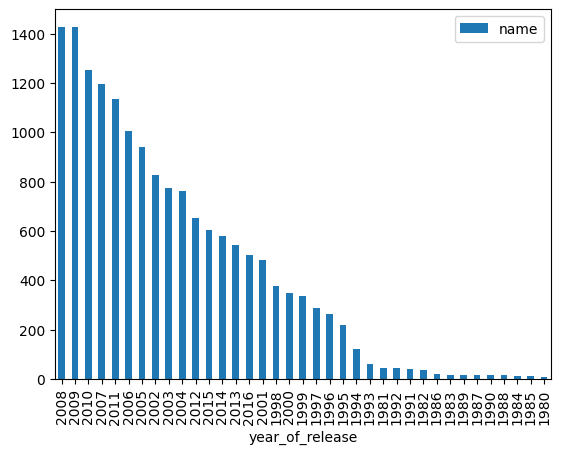

In [18]:
import matplotlib.pyplot as plt 

analisis_de_juegos_por_año.plot( x= 'year_of_release', kind= 'bar')

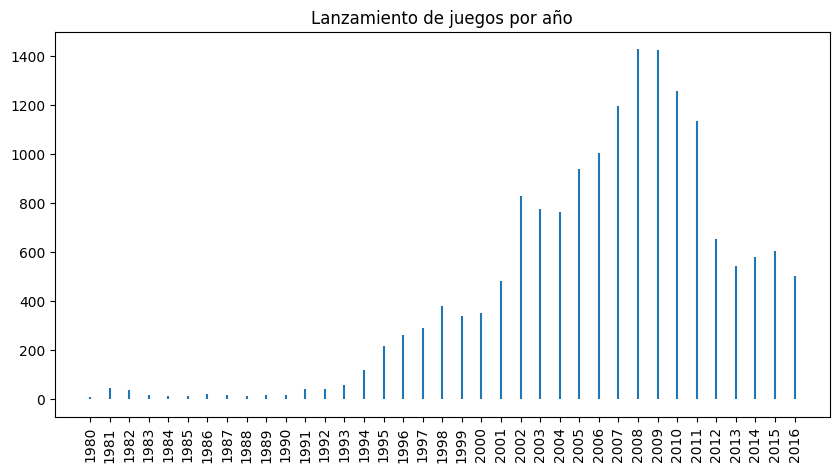

In [19]:
fig, ax = plt.subplots(figsize = (10,5))
ax.vlines (x= analisis_de_juegos_por_año.year_of_release, ymin = 0, ymax = analisis_de_juegos_por_año.name)
ax.set_title('Lanzamiento de juegos por año')
ax.set_xticks(analisis_de_juegos_por_año.year_of_release)
ax.set_xticklabels(analisis_de_juegos_por_año.year_of_release, rotation =90)
plt.show()


Los años en el que más juegos fueros lanzados estan entre el 2008 y 2009, mientras que en 1980, es el periodo donde menos se sacaron juegos.

In [20]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [21]:
ventas_plataforma_df = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

In [22]:
ventas_plataforma_df

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [23]:
ventas_plataforma_df['z_score'] = (ventas_plataforma_df['total_sales'] - ventas_plataforma_df['total_sales'].mean())/ventas_plataforma_df['total_sales'].std()

In [24]:
ventas_plataforma_df

,platform,total_sales,z_score
0,PS2,1255.77,2.780807
1,X360,971.42,1.964085
2,PS3,939.65,1.872834
3,Wii,907.51,1.780520
4,DS,806.12,1.489304
5,PS,730.86,1.273139
6,GBA,317.85,0.086875
7,PS4,314.14,0.076219
8,PSP,294.05,0.018516
9,PC,259.52,-0.080663


In [25]:
ventas_plataforma_df['color'] = ['red' if ventas_z < 0 else 'green' for ventas_z in ventas_plataforma_df['z_score']]

In [26]:
ventas_plataforma_df

,platform,total_sales,z_score,color
0,PS2,1255.77,2.780807,green
1,X360,971.42,1.964085,green
2,PS3,939.65,1.872834,green
3,Wii,907.51,1.780520,green
4,DS,806.12,1.489304,green
5,PS,730.86,1.273139,green
6,GBA,317.85,0.086875,green
7,PS4,314.14,0.076219,green
8,PSP,294.05,0.018516,green
9,PC,259.52,-0.080663,red


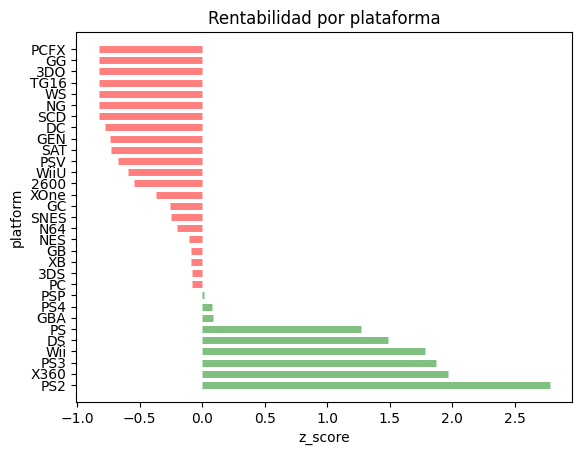

In [27]:
plt.figure()
plt.hlines(
    y= ventas_plataforma_df.platform, xmin = 0, xmax = ventas_plataforma_df.z_score, color = ventas_plataforma_df.color, linewidth = 5, alpha = 0.5
)
plt.ylabel ('platform')
plt.xlabel ('z_score')
plt.title ('Rentabilidad por plataforma')
plt.show()

Las plataformas en color **Verde** son rentables, hasta la plataforma PC es rentable, ya que no estan alejados de la media,  las demás plataformas son menos rentables.
Parece que las plataformas más rentables son PS2, X360 y PS3, mientras que las menos rentables son PCFX, GG, 3DO. 

In [28]:
games_clean_df = games_df.query('year_of_release >= 2013')

In [29]:
games_clean_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [30]:
tiempo_vida_df = pd.pivot_table(games_clean_df, index = 'year_of_release', columns='platform', values='total_sales', aggfunc = 'sum').fillna(0)

In [31]:
tiempo_vida_df

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [32]:
import seaborn as sns

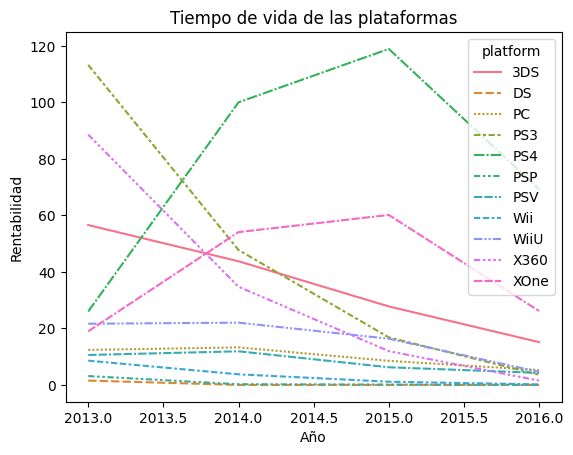

In [33]:
sns.lineplot(data= tiempo_vida_df)
plt.ylabel('Rentabilidad')
plt.xlabel('Año')
plt.title('Tiempo de vida de las plataformas')
plt.show()

C:\Users\Karina\AppData\Local\Temp\ipykernel_17840\2225457686.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


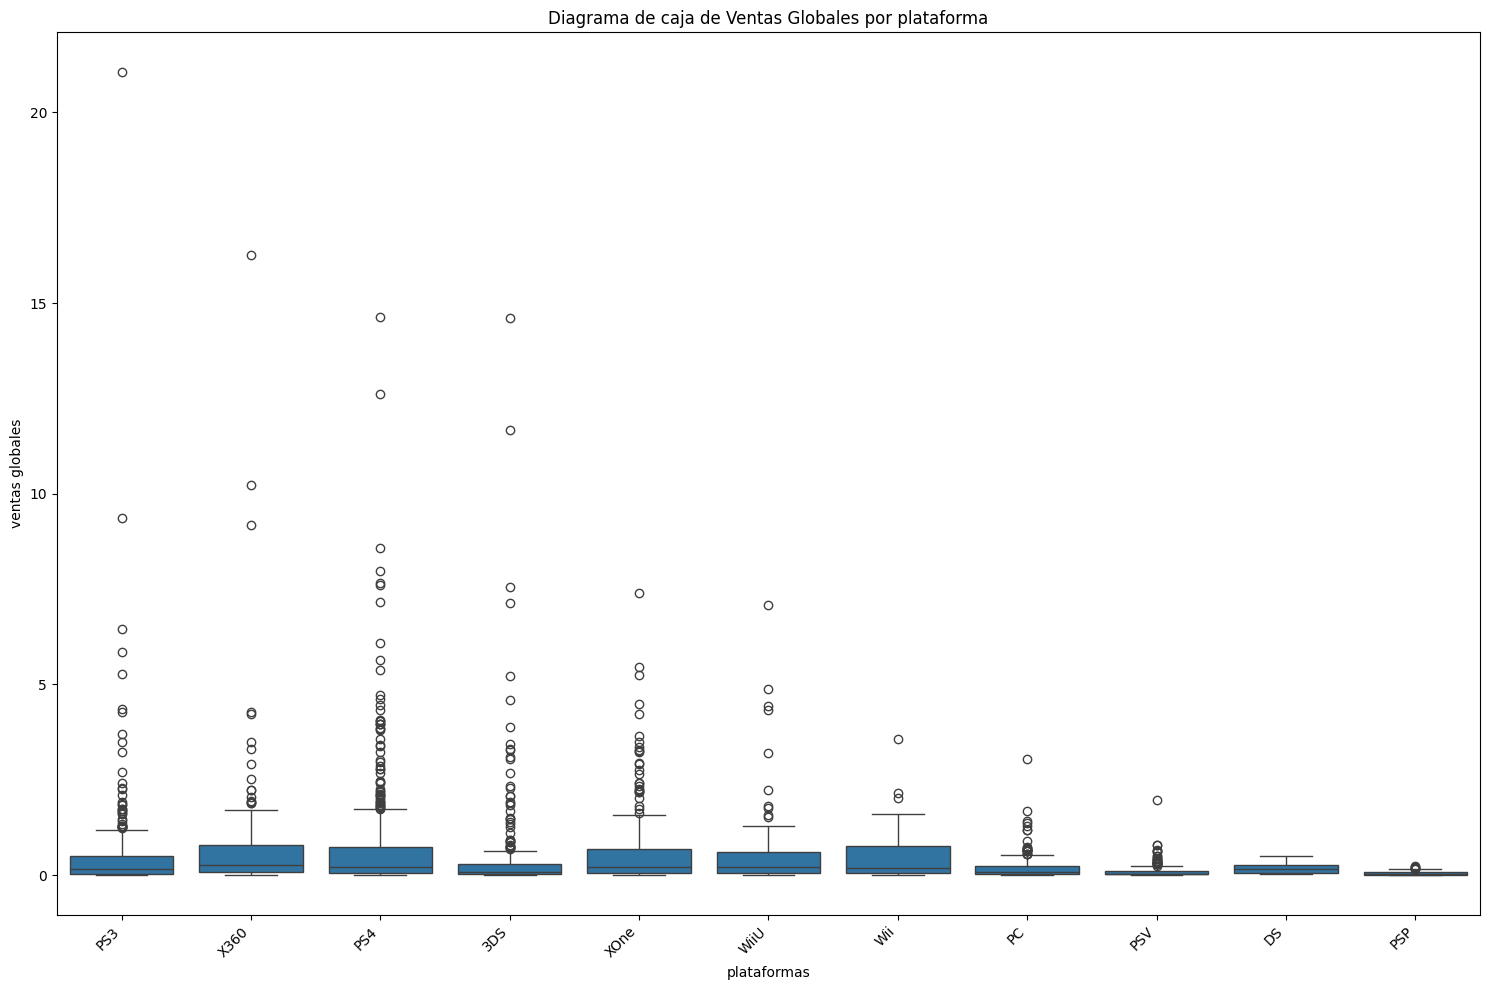

In [40]:
plt.figure(figsize=(15, 10))
ax= sns.boxplot ( x= 'platform', y= 'total_sales', data = games_clean_df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel ('plataformas')
plt.ylabel('ventas globales')
plt.title('Diagrama de caja de Ventas Globales por plataforma')

plt.tight_layout()
plt.show()

Las plataformas con cajas más grandes y amplias indican una mayor variabilidad en las ventas.
Las medias nos indican cuales son las plataformas con más ventas. 

x360 es una plataforma en la que en su caja tiene una mediana alta, so que significa que en promedio, los juegos de esta plataforma se suelen vender más.

 Algunas plataformas pueden tener una alta variabilidad en ventas, lo que sugiere que algunos juegos pueden tener ventas muy altas o bajas en comparación con otros juegos en la misma plataforma. 

Los valores atipicos, nos indican que algun juego no siguen la tendencia en vetas de su plataforma.

In [42]:
platform_df = games_clean_df[games_clean_df['platform'] == '3DS']

In [43]:
platform_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
184,Tomodachi Life,3DS,2013,Simulation,0.97,2.11,1.90,0.24,NaN,NaN,NaN,5.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16608,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16610,Kiniro no Corda 3,3DS,2015,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


user score vs. total_sales

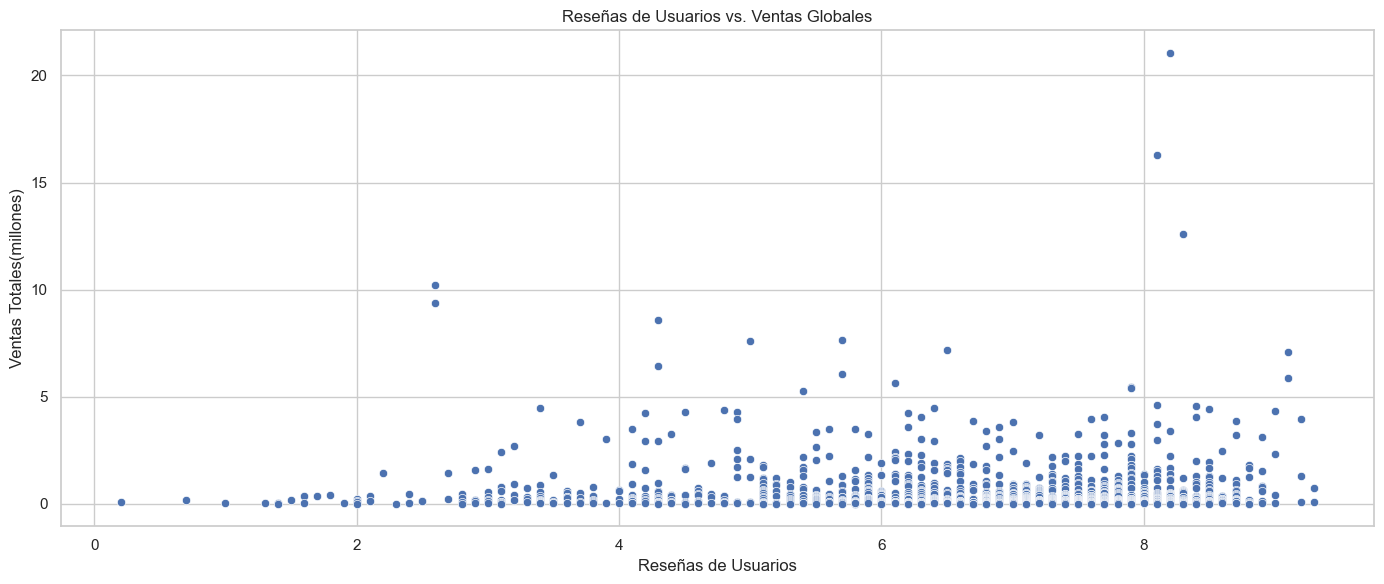

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr


plt.figure(figsize=(14, 6), alpha= 1)

# Gráfico de dispersión para reseñas de usuarios vs. ventas globales

sns.scatterplot(x='user_score', y='total_sales', data= games_clean_df)
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Totales(millones)')
plt.title('Reseñas de Usuarios vs. Ventas Globales')

plt.tight_layout()
plt.show()


In [68]:
correlacion_user_sales = games_clean_df['user_score'].corr(games_clean_df['total_sales'])
print(f'Correlación entre reseñas de usuarios y ventas totales: {correlacion_user_sales:.4f}')

Correlación entre reseñas de usuarios y ventas totales: -0.0026


Como se puede observar el grafico así como la correlación no hay una correlación clara entre la calificación de los usuarios y las ventas totales.

Critic_score VS total_sales

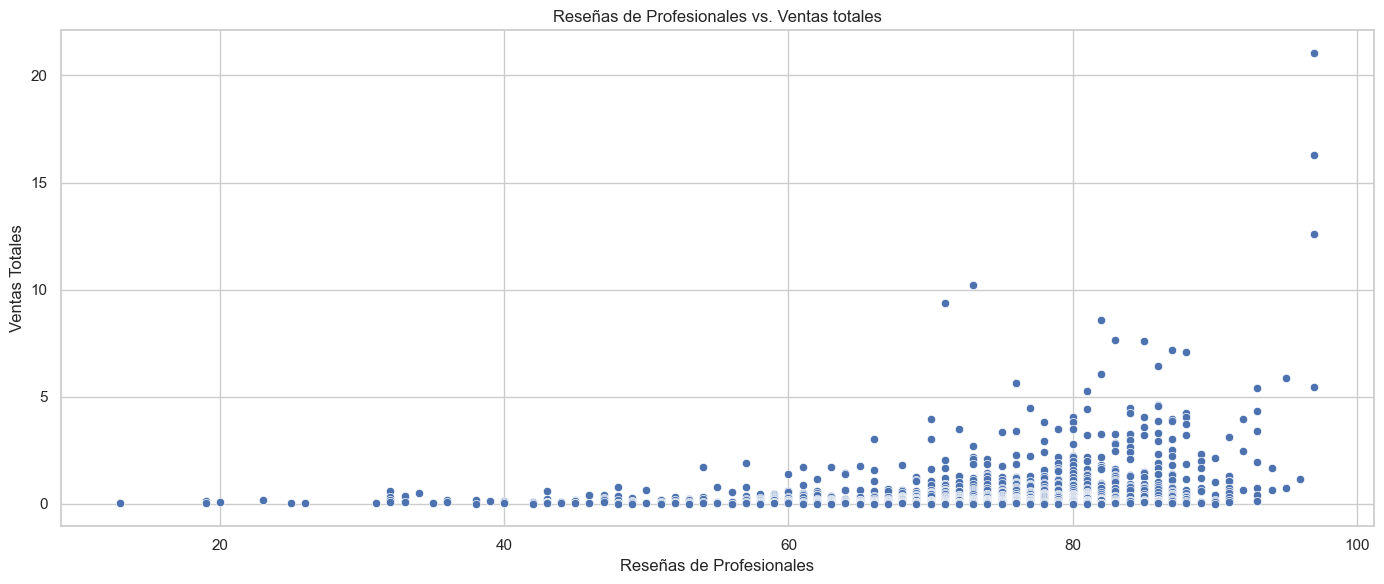

In [56]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=games_clean_df)
plt.xlabel('Reseñas de Profesionales')
plt.ylabel('Ventas Totales')
plt.title('Reseñas de Profesionales vs. Ventas totales')

plt.tight_layout()
plt.show()

In [67]:
correlacion_critic_sales = games_clean_df['critic_score'].corr(games_clean_df['total_sales'])
print(f'Correlación entre reseñas de criticos y ventas totales: {correlacion_critic_sales:.4f}')

Correlación entre reseñas de criticos y ventas totales: 0.3137


Nuestra correlación es positiva, por lo que a medida de que la calificación de la critica aumente, aumentaran las ventas, pero es importante destacar que no es una correlaaciópn muy fuerte.

In [73]:
games_clean_df['name'].nunique()

1263

In [81]:
common_games = games_clean_df['name'].value_counts()

common_games

name
FIFA 14                                                9
LEGO Marvel Super Heroes                               9
LEGO The Hobbit                                        8
Angry Birds Star Wars                                  8
LEGO Jurassic World                                    8
                                                      ..
Mario & Luigi: Paper Jam & Mario Kart 7 Double Pack    1
Romeo Vs. Juliet                                       1
Kiniro no Corda 3                                      1
Codename: Panzers Complete Collection                  1
Norn + Nonette: Act Tune                               1
Name: count, Length: 1263, dtype: int64

In [75]:

common_games = games_clean_df['name'].value_counts()
common_games = common_games[common_games > 1].



                         name platform  year_of_release    genre  na_sales  \
16         Grand Theft Auto V      PS3             2013   Action      7.02   
23         Grand Theft Auto V     X360             2013   Action      9.66   
31  Call of Duty: Black Ops 3      PS4             2015  Shooter      6.03   
42         Grand Theft Auto V      PS4             2014   Action      3.96   
60       Call of Duty: Ghosts     X360             2013  Shooter      6.73   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
16      9.09      0.98         3.96          97.0         8.2      M   
23      5.14      0.06         1.41          97.0         8.1      M   
31      5.86      0.36         2.38           NaN         NaN    NaN   
42      6.31      0.38         1.97          97.0         8.3      M   
60      2.56      0.04         0.91          73.0         2.6      M   

    total_sales  
16        21.05  
23        16.27  
31        14.63  
42        12.62  
60      